In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
data = pd.read_csv('bankchurn.csv')
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# display top 5 rows of the dataset
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# display last 5 rows of the dataset
data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# shape of dataset
data.shape

(10000, 13)

In [6]:
print('Number of Rows :',data.shape[0])
print('Number of Columns :',data.shape[1])

Number of Rows : 10000
Number of Columns : 13


In [7]:
# information of datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
# Printing Unique Values of the categorical variables 

print (data['Geography']. unique())
print (data['Gender'].unique())
print (data['NumOfProducts'].unique()) 
print (data[ 'HasCrCard'].unique())
print (data['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [9]:
# check null values
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#checking for duplicates
data[data.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


no duplicate values

In [11]:
from tabulate import tabulate
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<100:
            
            categorical.append(column)
            
        else:
            continuous.append(column) 
    return categorical , continuous
categorical , continuous = separate_data_types(data)

table=[categorical , continuous]
print(tabulate({'categorical':categorical ,'continuous':continuous},headers=['categorical' ,'continuous']))

categorical     continuous
--------------  ---------------
Geography       CustomerId
Gender          Surname
Age             CreditScore
Tenure          Balance
NumOfProducts   EstimatedSalary
HasCrCard
IsActiveMember
Exited


In [12]:
categorical.remove('Age')
continuous.append('Age')

In [13]:
categorical.remove('Tenure')
continuous.append('Tenure')

In [14]:
print(categorical)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [15]:
print(continuous)

['CustomerId', 'Surname', 'CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'Tenure']


# outlier treatment


In [16]:
# ovreall statistics
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
# outlier treatment
data.describe([.80,.90,.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
80%,1.576582e+07,735.000000,46.000000,8.000000,133710.358000,2.000000,1.00000,1.000000,159836.726000,1.000000
90%,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
99%,1.581311e+07,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
data_1=pd.read_csv("bankchurn.csv")
print('row and col before removing outliers :',data_1.shape)
print('.......wait till shape after removing outlier is printed.....')

def myoutliers(data,col):
    Q3= np.quantile(data[col],0.75)
    Q1= np.quantile(data[col],0.25)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    lower_range=Q1-1.5 *IQR
    upper_range=Q3+1.5 *IQR
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist= [x for x in data[col] if( (x < lower_range) | (x > upper_range))] # list comprehenssion
    print('total outlier in ', col,'are',len(mylist))
    my_outlier_df = data.loc[data[col].isin(mylist)]

k=[ 'CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'Tenure']
for i in k :
    print(' i  is ',i)
    myoutliers(data_1,i)
    print('**'*30)

row and col before removing outliers : (10000, 13)
.......wait till shape after removing outlier is printed.....
 i  is  CreditScore
the lower range of CreditScore is 383.0
the upper range of CreditScore is 919.0
total outlier in  CreditScore are 15
************************************************************
 i  is  Balance
the lower range of Balance is -191466.36000000002
the upper range of Balance is 319110.60000000003
total outlier in  Balance are 0
************************************************************
 i  is  EstimatedSalary
the lower range of EstimatedSalary is -96577.09624999999
the upper range of EstimatedSalary is 296967.45375
total outlier in  EstimatedSalary are 0
************************************************************
 i  is  Age
the lower range of Age is 14.0
the upper range of Age is 62.0
total outlier in  Age are 359
************************************************************
 i  is  Tenure
the lower range of Tenure is -3.0
the upper range of Tenure is 13.0


In [19]:
col_corr=data.corr()
col_corr

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

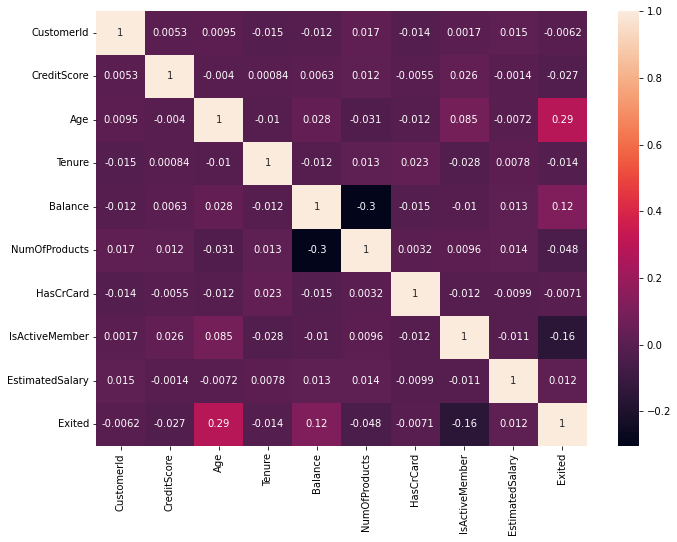

In [20]:
fig, ax = plt.subplots(figsize=(11, 8)) 
sns.heatmap(data.corr(),annot=True)

# EDA 

### Univariate

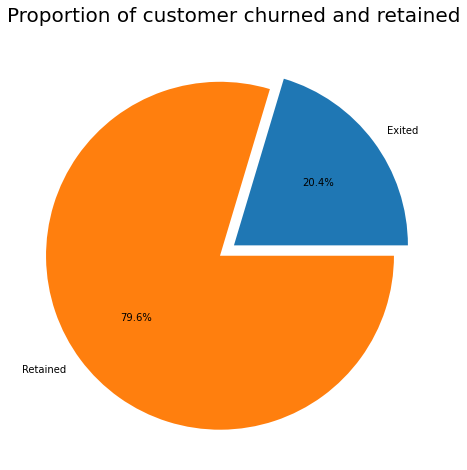

In [21]:
# retained and exited

labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

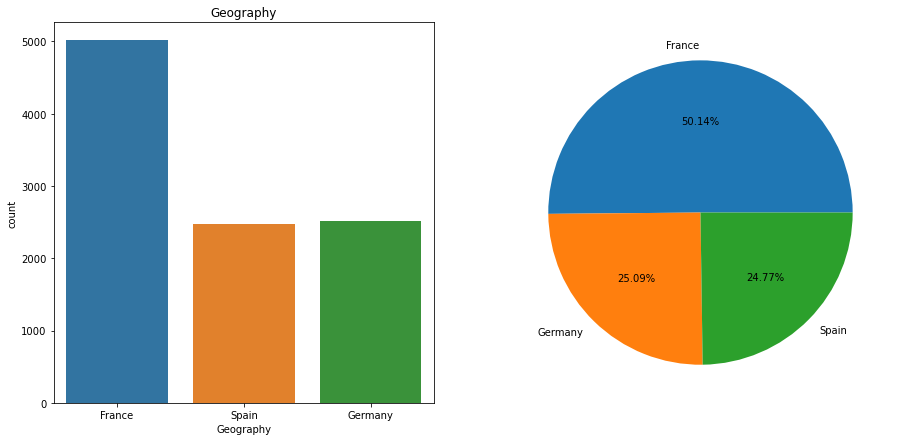

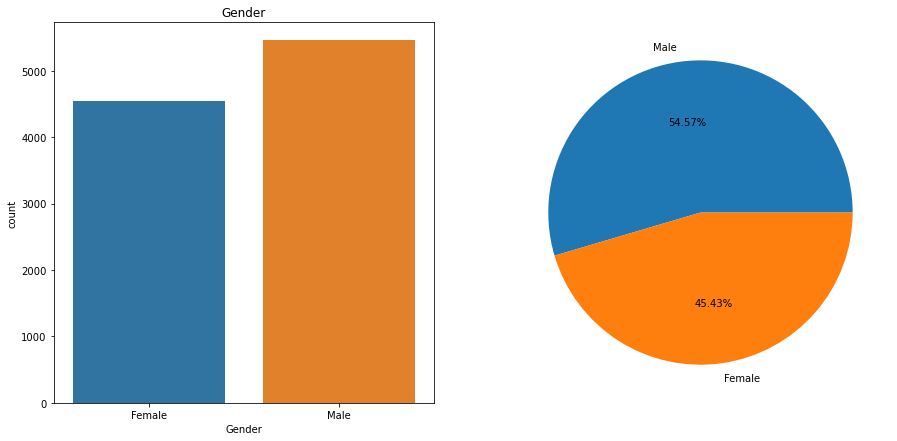

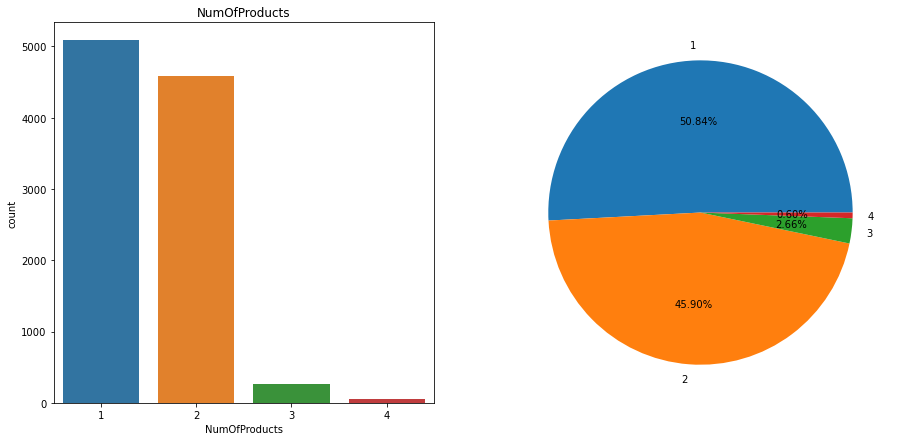

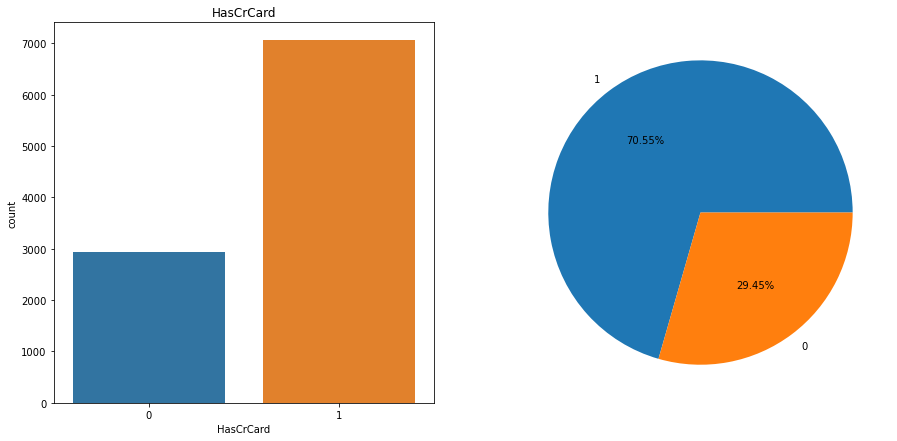

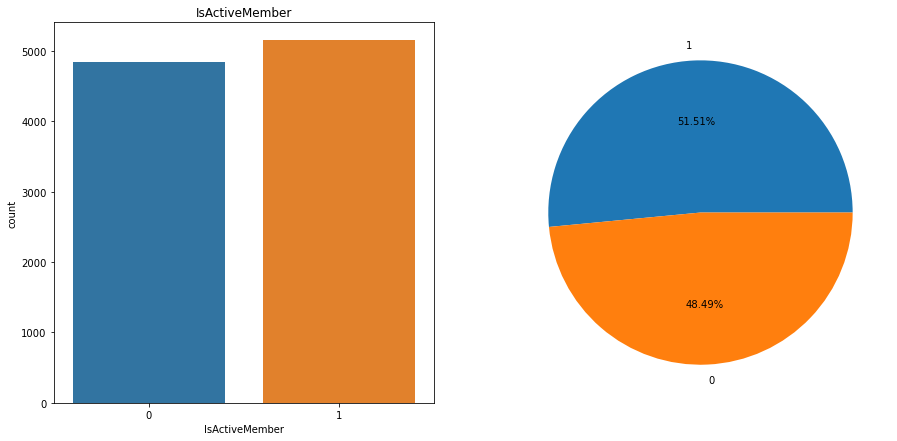

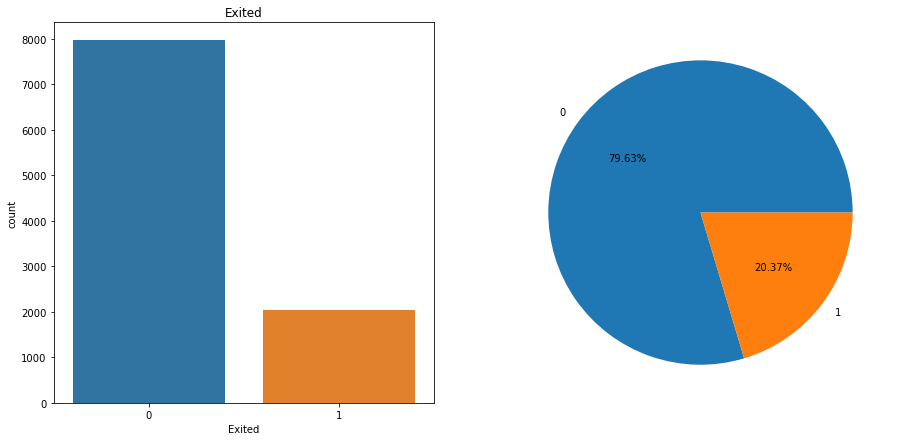

In [22]:
for i in categorical:
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    ax[0].set_title(i)
    percentage=data[i].value_counts()
    labels=list(data[i].value_counts().index)
    sns.countplot(x=data[i],ax=ax[0])
    plt.pie(percentage,labels=labels,autopct="%0.2f%%")
    plt.show()

<AxesSubplot:xlabel='Gender'>

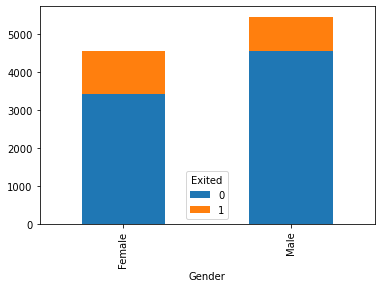

In [23]:
# gender vise exited
counts = data.groupby(['Gender', 'Exited']).Exited.count().unstack()
counts.plot(kind='bar', stacked=True)

From the output, it seems that the ratio of customers leaving the bank among females is higher than the males. 

In [24]:
print(counts)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


<AxesSubplot:xlabel='Geography'>

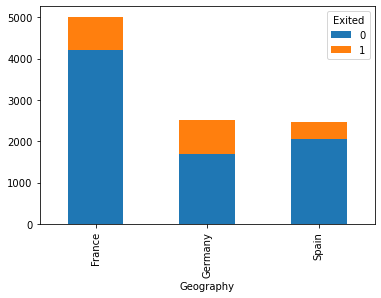

In [25]:
# geography and exited
counts = data.groupby(['Geography', 'Exited']).Exited.count().unstack()
counts.plot(kind='bar', stacked=True)

The output shows that the ratio of customer churn is highest among the German customers while lower among the French customers.

In [26]:
print(counts)

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


### Bivariate

In [27]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

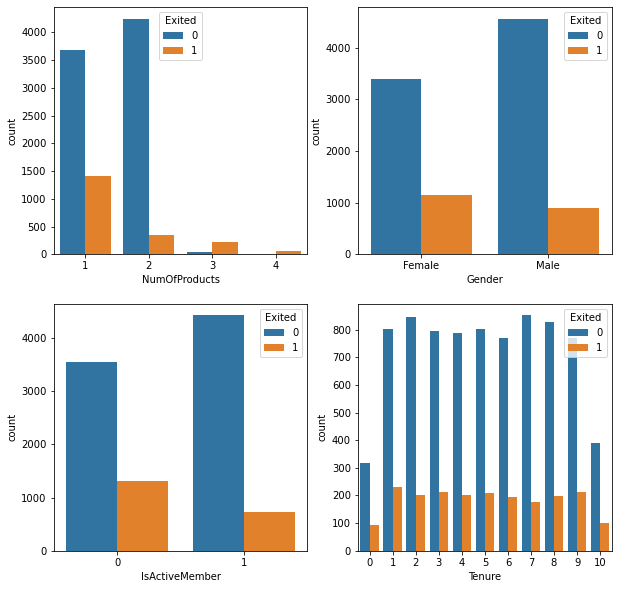

In [28]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='NumOfProducts',hue='Exited',data=data,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='Gender',hue='Exited',data=data,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='IsActiveMember',hue='Exited',data=data,ax=ax[1,0])
ax[1,0].set_title('')
sns.countplot(x='Tenure',hue='Exited',data=data,ax=ax[1,1])
ax[1,1].set_title('')
plt.show()  

<AxesSubplot:xlabel='Geography', ylabel='count'>

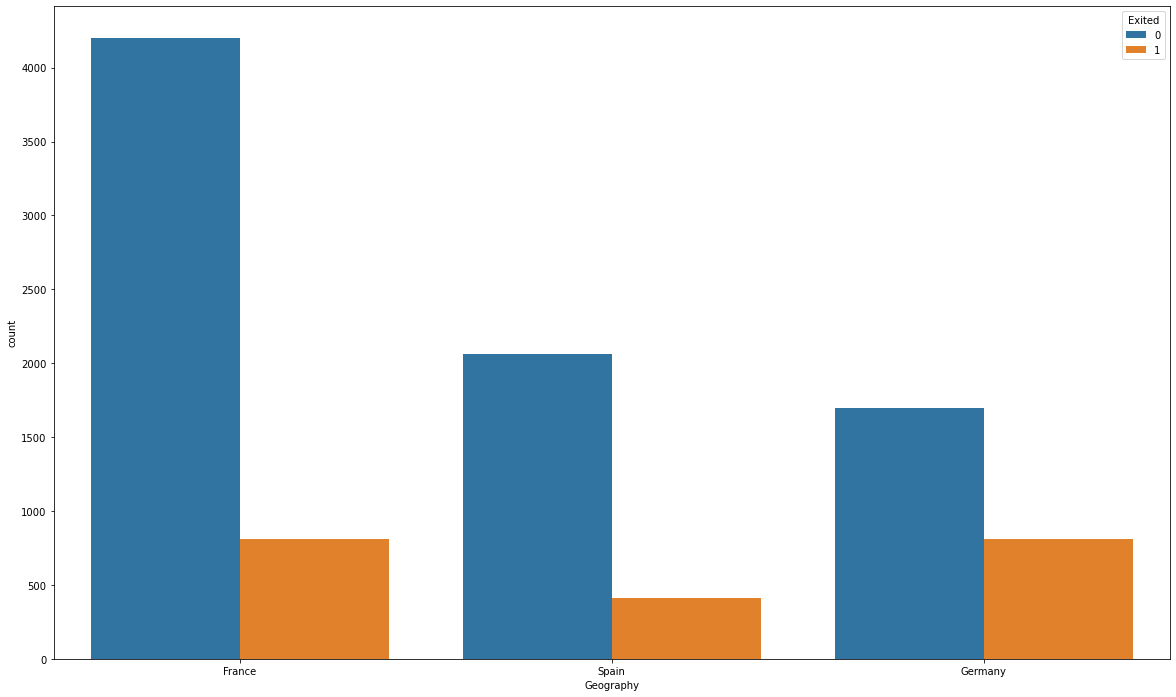

In [29]:
fig, axarr = plt.subplots(figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data)

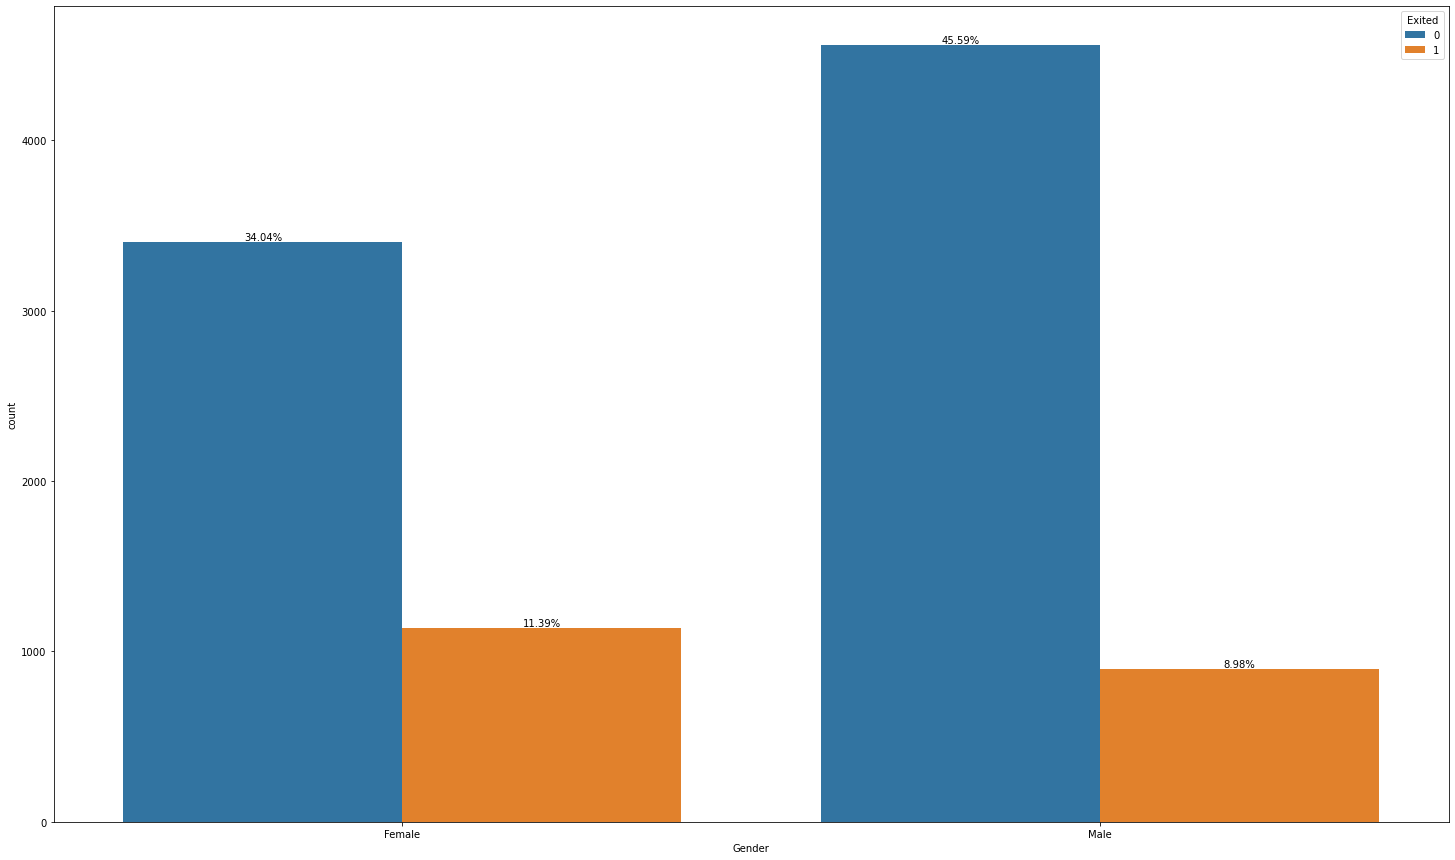

In [30]:
fig,ax= plt.subplots(figsize=(15,10))
sns.countplot(x='Gender',hue='Exited',data=data)

count=len(data['Exited'])
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')
    fig.set_figheight(15)
    fig.set_figwidth(25)
plt.show()

### Multivariate 

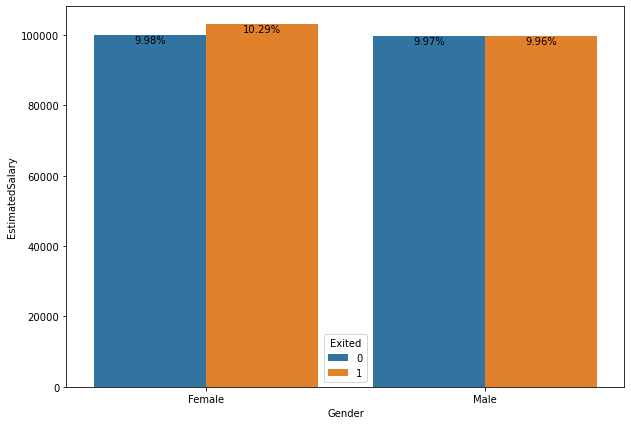

In [31]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=data['Gender'],y=data['EstimatedSalary'],hue=data['Exited'],ci=None,ax=ax)
count=len(data['Gender'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

In [32]:
# dropping columns
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
data = data.drop(['CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# encoding categorical data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
# creating dummies
data = pd.get_dummies(data, columns =["Geography", "Gender"], drop_first = False)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [37]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [38]:
std_scaler = StandardScaler()

scale_columns = [ 'CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
       
data[scale_columns] = std_scaler.fit_transform(data[scale_columns])
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [39]:
target='Exited'

y=data[target]
x=data.drop(target, axis=1)

In [40]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,0,1,0,0,1


In [41]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [42]:
# Train-Test Separation

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100) 

In [43]:
## User defined function for accuracy report

def confusionMatrix(data):
    #accuracy score
    print("Accuracy Score = {}".format(accuracy_score(data.actual,data.predicted)))
    print("\n")
    #Confusion Matrix
    print("Confusion Matrix")
    print(pd.crosstab(data.actual,data.predicted,margins=True))
    print("\n")
    #Classification Report
    print("Calssification Report\n",classification_report(data.actual, data.predicted))
    
    # ROC /AUC
    fpr,tpr,_=metrics.roc_curve(data.actual,data.predicted)
    area_under_curve=metrics.auc(fpr,tpr)
    
    #plot the ROC
    
    plt.title("Receptive Characterstic Curve")
    plt.plot(fpr,tpr,'b',label="AUC="+str(area_under_curve))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') #dummy model
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()

In [44]:
lr = []
lr.append(('Logistic Regression', LogisticRegression(random_state = 100)))

In [45]:
result_1 = []
name_1 = []

In [46]:
for name, model in lr:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    msg = '%s: (%f)'% (name,accuracy)
    print(msg)

Logistic Regression: (0.804000)


In [47]:
from sklearn.metrics import classification_report
from sklearn import metrics

Accuracy Score = 0.804


Confusion Matrix
predicted     0    1   All
actual                    
0          1529   59  1588
1           333   79   412
All        1862  138  2000


Calssification Report
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      1588
           1       0.57      0.19      0.29       412

    accuracy                           0.80      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000



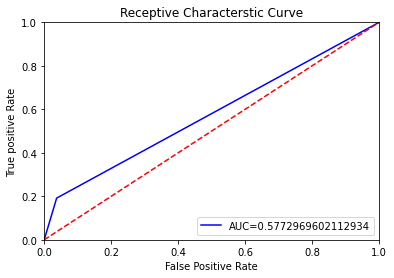

None


In [48]:
## Actual vs Predicted

df=pd.DataFrame({'actual':y_test,'predicted':y_pred.flatten(),'True/false':y_test==y_pred})

df

print(confusionMatrix(df))

In [49]:
knn = []
knn.append(('KNN', KNeighborsClassifier()))

In [50]:
result_2 = []
name_2 = []

In [51]:
for name, model in knn:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    msg = '%s: (%f)'% (name,accuracy)
    print(msg)

KNN: (0.834500)


Accuracy Score = 0.8345


Confusion Matrix
predicted     0    1   All
actual                    
0          1507   81  1588
1           250  162   412
All        1757  243  2000


Calssification Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1588
           1       0.67      0.39      0.49       412

    accuracy                           0.83      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.82      0.83      0.82      2000



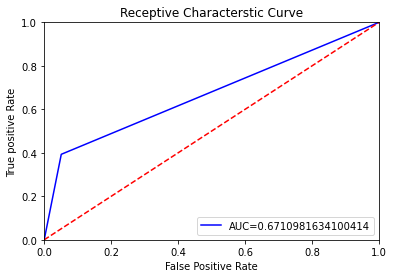

None


In [52]:
## Actual vs Predicted

df=pd.DataFrame({'actual':y_test,'predicted':y_pred.flatten(),'True/false':y_test==y_pred})

df

print(confusionMatrix(df))

In [53]:
dt = []
dt.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state = 100)))

In [54]:
result_3 = []
name_3 = []

In [55]:
for name, model in dt:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    msg = '%s: (%f)'% (name,accuracy)
    print(msg)

Decision Tree Classifier: (0.791000)


Accuracy Score = 0.791


Confusion Matrix
predicted     0    1   All
actual                    
0          1372  216  1588
1           202  210   412
All        1574  426  2000


Calssification Report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1588
           1       0.49      0.51      0.50       412

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.79      0.79      2000



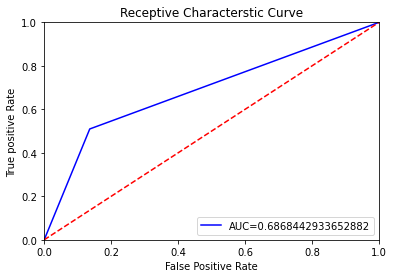

None


In [56]:
## Actual vs Predicted

df=pd.DataFrame({'actual':y_test,'predicted':y_pred.flatten(),'True/false':y_test==y_pred})

df

print(confusionMatrix(df))

In [57]:
rf = []
rf.append(('Random Forest',RandomForestClassifier(random_state = 100)))

In [58]:
result_4 = []
name_4 = []

In [59]:
for name, model in rf:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    msg = '%s: (%f)'% (name,accuracy)
    print(msg)

Random Forest: (0.857500)


Accuracy Score = 0.8575


Confusion Matrix
predicted     0    1   All
actual                    
0          1539   49  1588
1           236  176   412
All        1775  225  2000


Calssification Report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.78      0.43      0.55       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



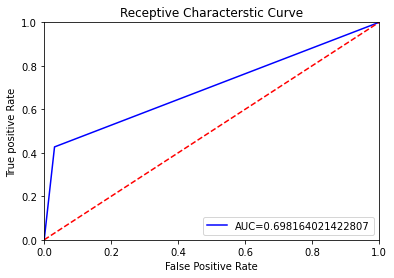

None


In [60]:
## Actual vs Predicted

df=pd.DataFrame({'actual':y_test,'predicted':y_pred.flatten(),'True/false':y_test==y_pred})

df

print(confusionMatrix(df))

In [61]:
svm = []
svm.append(('Support Vector Machine',SVC(gamma = 'auto',random_state = 100)))

In [62]:
result_5 = []
name_5 = []

In [63]:
for name, model in svm:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    msg = '%s: (%f)'% (name,accuracy)
    print(msg)

Support Vector Machine: (0.847500)


Accuracy Score = 0.8475


Confusion Matrix
predicted     0    1   All
actual                    
0          1556   32  1588
1           273  139   412
All        1829  171  2000


Calssification Report
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1588
           1       0.81      0.34      0.48       412

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.69      2000
weighted avg       0.84      0.85      0.82      2000



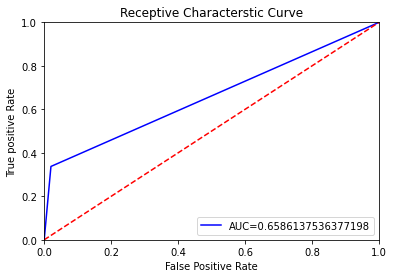

None


In [64]:
## Actual vs Predicted

df=pd.DataFrame({'actual':y_test,'predicted':y_pred.flatten(),'True/false':y_test==y_pred})

df

print(confusionMatrix(df))

In [65]:
series_pred = pd.Series(y_pred)


df1 = pd.DataFrame(data=series_pred, columns=['prediction'])
df = pd.merge(df1, y_test, left_index=True, right_index=True)
df.head()

,prediction,Exited
12,0,0
21,0,0
22,0,1
25,0,0
29,0,0


C:\Users\KUSHAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


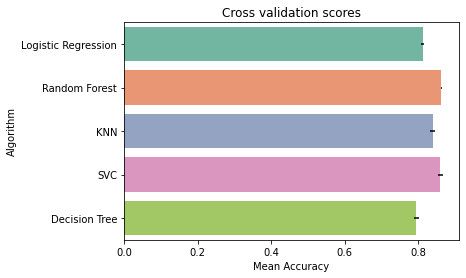

In [66]:
# cross validation

# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)

# Modeling step Test differents algorithms 
random_state = 100
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
cv_results = []

for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"Cross Val Means":cv_means,"Cross Val errors": cv_std,"Algorithm":["Logistic Regression","Random Forest","KNN","SVC","Decision Tree"]})
g = sns.barplot("Cross Val Means","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [68]:
cv_res

,Cross Val Means,Cross Val errors,Algorithm
0,0.812625,0.003455,Logistic Regression
1,0.863500,0.002325,Random Forest
2,0.839500,0.007109,KNN
3,0.860875,0.006633,SVC
4,0.795250,0.007401,Decision Tree
